In [1]:
# imports
import pickle
import matplotlib
import matplotlib.pyplot as plt
import os
import numpy as np

plt.rcParams['figure.figsize'] = (10, 8)

# Model 1

Params:
* Features: unigrams, bigrams (Minimal)
* Epochs: 100
* Feature Threshold: 0

In [29]:
model_dir = './data/Model 1/'
result_file = './data/Model 1/train_m1.labeled_100_epochs.results'
ckpts = [f for f in os.listdir(model_dir) if f.endswith('checkpoint')]
ckpts = sorted(ckpts, key=lambda k: int(k.split('_')[-1].split('.')[0]))
valid_cpkts = [int(k.split('_')[-1].split('.')[0]) for k in ckpts]

In [30]:
with open(result_file, 'rb') as fp:
    r_dict = pickle.load(fp)
train_word_acc = r_dict['train_word_acc']
train_sen_acc = r_dict['train_sen_acc']
train_ckpts = list(range(1, len(train_word_acc) + 1))

In [31]:
valid_word_acc = []
valid_sen_acc = []
for c in ckpts:
    with open(os.path.join(model_dir,c), 'rb') as fp:
        v_dict = pickle.load(fp)
    valid_word_acc.append(v_dict['valid_acc'][1])
    valid_sen_acc.append(v_dict['valid_acc'][0])

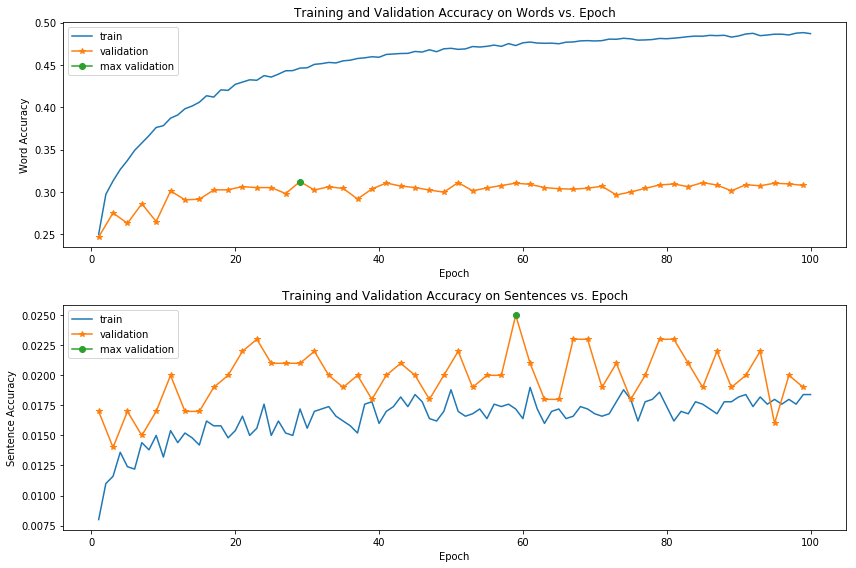

In [32]:
# plot
plt.rcParams['figure.figsize'] = (12, 8)
plt.subplot(2,1,1)
plt.plot(train_ckpts, train_word_acc, label='train')
plt.plot(valid_cpkts, valid_word_acc, label='validation', marker='*')
plt.plot(valid_cpkts[valid_word_acc.index(max(valid_word_acc))], max(valid_word_acc),
         label='max validation', marker='o')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel("Word Accuracy")
plt.title("Training and Validation Accuracy on Words vs. Epoch")

plt.subplot(2,1,2)
plt.plot(train_ckpts, train_sen_acc, label='train')
plt.plot(valid_cpkts, valid_sen_acc, label='validation', marker='*')
plt.plot(valid_cpkts[valid_sen_acc.index(max(valid_sen_acc))], max(valid_sen_acc),
         label='max validation', marker='o')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel("Sentence Accuracy")
plt.title("Training and Validation Accuracy on Sentences vs. Epoch")
plt.tight_layout()

In [33]:
max_ckpt = valid_cpkts[valid_word_acc.index(max(valid_word_acc))]
max_acc = max(valid_word_acc)
max_ckpt_file = ckpts[valid_word_acc.index(max(valid_word_acc))]
max_acc_weights_path = os.path.join(model_dir, "model1best.weights")
print("max test accuracy is : {:.3} @ epoch: {}".format(max_acc, max_ckpt))
with open(os.path.join(model_dir,max_ckpt_file), 'rb') as fp:
    ckpt_rs = pickle.load(fp)
    with open(max_acc_weights_path, 'wb') as fw:
        pickle.dump(ckpt_rs['weights'], fw)
    print("saved best weights @ ", max_acc_weights_path)

max test accuracy is : 0.312 @ epoch: 29
saved best weights @  ./data/Model 1/model1best.weights


In [34]:
with open(max_acc_weights_path, 'rb') as fp:
    m_1_weights = pickle.load(fp)
print(m_1_weights)

[2.0, 4.0, -3.0, -1.0, -17.0, -1.0, 2.0, -3.0, -4.0, -3.0, 0.0, 0.0, 2.0, 2.0, 2.0, 7.0, 0.0, 20.0, 4.0, 0.0, 1.0, 6.0, -2.0, 0.0, 1.0, 1.0, 4.0, 0.0, -3.0, 3.0, 2.0, -1.0, 0.0, 3.0, 2.0, 1.0, 3.0, -2.0, 5.0, -1.0, 3.0, 2.0, 2.0, 0.0, -3.0, -1.0, 4.0, -1.0, 3.0, 0.0, -1.0, 3.0, 3.0, 1.0, 2.0, -1.0, 1.0, 0.0, -5.0, 1.0, 1.0, 1.0, -4.0, 2.0, 4.0, 1.0, -7.0, 1.0, 9.0, 3.0, -1.0, -10.0, 5.0, 2.0, 0.0, 1.0, 1.0, -3.0, -13.0, 1.0, 4.0, -2.0, 0.0, 1.0, -2.0, 11.0, -3.0, 5.0, 3.0, -1.0, 2.0, 1.0, 0.0, 4.0, 1.0, -2.0, -4.0, 0.0, -1.0, 1.0, 1.0, -1.0, -1.0, 2.0, 3.0, -1.0, -1.0, 0.0, 3.0, -2.0, 6.0, 0.0, 2.0, 1.0, -1.0, 0.0, -1.0, 0.0, 1.0, -1.0, 0.0, 2.0, 2.0, 2.0, 1.0, -4.0, -1.0, -1.0, -1.0, 2.0, 2.0, -2.0, 3.0, 4.0, -2.0, 6.0, 2.0, 1.0, 3.0, 4.0, 0.0, -5.0, 5.0, -1.0, 2.0, -3.0, 3.0, 0.0, 4.0, -1.0, 0.0, -1.0, 0.0, -1.0, -7.0, -4.0, -6.0, 4.0, -2.0, 8.0, -3.0, 5.0, 3.0, -1.0, 0.0, -6.0, 6.0, -5.0, -3.0, 1.0, -6.0, 0.0, 0.0, 3.0, 4.0, 7.0, 3.0, -2.0, 2.0, -1.0, 4.0, 3.0, 4.0, 5.0, 1.0, 4.0, 2

# Model 2

Params:
* Features: unigrams, bigrams (full), McDonald
* Epochs: 100
* Feature Threshold: 1

In [3]:
model_dir = './data/Model 2/'
result_file = './data/Model 2/train_m2.labeled_100_epochs.results'
ckpts = [f for f in os.listdir(model_dir) if f.endswith('checkpoint')]
ckpts = sorted(ckpts, key=lambda k: int(k.split('_')[-1].split('.')[0]))
valid_cpkts = [int(k.split('_')[-1].split('.')[0]) for k in ckpts]

In [4]:
with open(result_file, 'rb') as fp:
    r_dict = pickle.load(fp)
train_word_acc = r_dict['train_word_acc']
train_sen_acc = r_dict['train_sen_acc']
train_ckpts = list(range(1, len(train_word_acc) + 1))

In [5]:
valid_word_acc = []
valid_sen_acc = []
for c in ckpts:
    with open(os.path.join(model_dir,c), 'rb') as fp:
        v_dict = pickle.load(fp)
    valid_word_acc.append(v_dict['valid_acc'][1])
    valid_sen_acc.append(v_dict['valid_acc'][0])

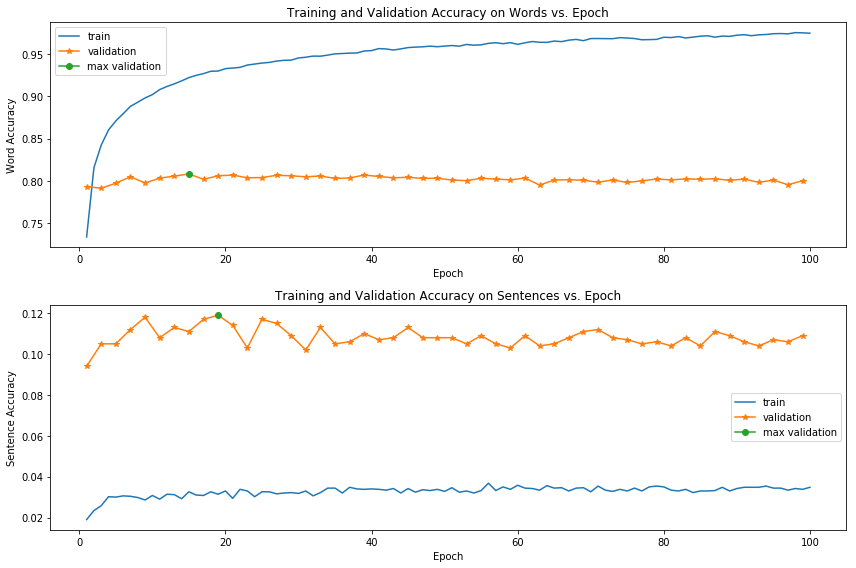

In [6]:
# plot
plt.rcParams['figure.figsize'] = (12, 8)
plt.subplot(2,1,1)
plt.plot(train_ckpts, train_word_acc, label='train')
plt.plot(valid_cpkts, valid_word_acc, label='validation', marker='*')
plt.plot(valid_cpkts[valid_word_acc.index(max(valid_word_acc))], max(valid_word_acc),
         label='max validation', marker='o')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel("Word Accuracy")
plt.title("Training and Validation Accuracy on Words vs. Epoch")

plt.subplot(2,1,2)
plt.plot(train_ckpts, train_sen_acc, label='train')
plt.plot(valid_cpkts, valid_sen_acc, label='validation', marker='*')
plt.plot(valid_cpkts[valid_sen_acc.index(max(valid_sen_acc))], max(valid_sen_acc),
         label='max validation', marker='o')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel("Sentence Accuracy")
plt.title("Training and Validation Accuracy on Sentences vs. Epoch")
plt.tight_layout()

In [22]:
max_ckpt = valid_cpkts[valid_word_acc.index(max(valid_word_acc))]
max_acc = max(valid_word_acc)
max_ckpt_file = ckpts[valid_word_acc.index(max(valid_word_acc))]
max_acc_weights_path = os.path.join(model_dir, "model2best.weights")
print("max test accuracy is : {:.3} @ epoch: {}".format(max_acc, max_ckpt))
with open(os.path.join(model_dir,max_ckpt_file), 'rb') as fp:
    ckpt_rs = pickle.load(fp)
    with open(max_acc_weights_path, 'wb') as fw:
        pickle.dump(ckpt_rs['weights'], fw)
    print("saved best weights @ ", max_acc_weights_path)

max test accuracy is : 0.808 @ epoch: 15
saved best weights @  ./data/Model 2/model2best.weights


In [23]:
with open(max_acc_weights_path, 'rb') as fp:
    m_2_weights = pickle.load(fp)
print(m_2_weights)

[3.0, 2.0, -6.0, -2.0, -68.0, -6.0, 0.0, 3.0, -9.0, -3.0, -4.0, 4.0, 2.0, -3.0, 5.0, 9.0, 1.0, 36.0, 2.0, 5.0, -2.0, -2.0, -7.0, -4.0, 1.0, -5.0, 3.0, 0.0, -3.0, -6.0, 5.0, 1.0, 1.0, 3.0, 2.0, 0.0, 10.0, 3.0, -2.0, 4.0, 6.0, 0.0, 1.0, 7.0, 2.0, 8.0, -5.0, 2.0, 0.0, 8.0, 1.0, -4.0, -3.0, -1.0, 2.0, -8.0, 1.0, 1.0, 1.0, -8.0, -2.0, -1.0, 7.0, -12.0, 13.0, 2.0, -3.0, 5.0, 7.0, 2.0, -3.0, -1.0, -5.0, -5.0, 1.0, -1.0, 2.0, 1.0, -10.0, 0.0, 6.0, 4.0, 18.0, 3.0, -1.0, 0.0, -1.0, 4.0, -3.0, -9.0, -5.0, -1.0, 1.0, -3.0, -6.0, 10.0, -4.0, 0.0, 0.0, 0.0, 1.0, 1.0, -4.0, -1.0, -2.0, -2.0, 1.0, 20.0, 4.0, 10.0, 2.0, 3.0, 0.0, 1.0, 5.0, -3.0, 4.0, 6.0, 6.0, 2.0, 0.0, -12.0, 2.0, -1.0, 9.0, 5.0, -6.0, 1.0, 10.0, -3.0, 14.0, 4.0, -4.0, 3.0, 5.0, 0.0, -3.0, 4.0, 2.0, -3.0, -7.0, 5.0, 1.0, 12.0, 2.0, 2.0, 3.0, 0.0, 5.0, 4.0, 0.0, -18.0, 2.0, 0.0, 2.0, 6.0, -1.0, 6.0, 7.0, 3.0, -1.0, 3.0, 0.0, 1.0, -8.0, 4.0, 0.0, 2.0, 9.0, 4.0, 3.0, -2.0, -8.0, -7.0, -2.0, 11.0, -5.0, 0.0, -1.0, 8.0, -1.0, -10.0, -5.0, 